<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Classificação
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Classificação;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever a espécie do penguin (**species**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [23]:
import sklearn
import graphviz
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [2]:
penguim = sns.load_dataset('penguins')

In [3]:
penguim.head(25)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


### **1.1. Análise exploratória**

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos numéricos por espécie:

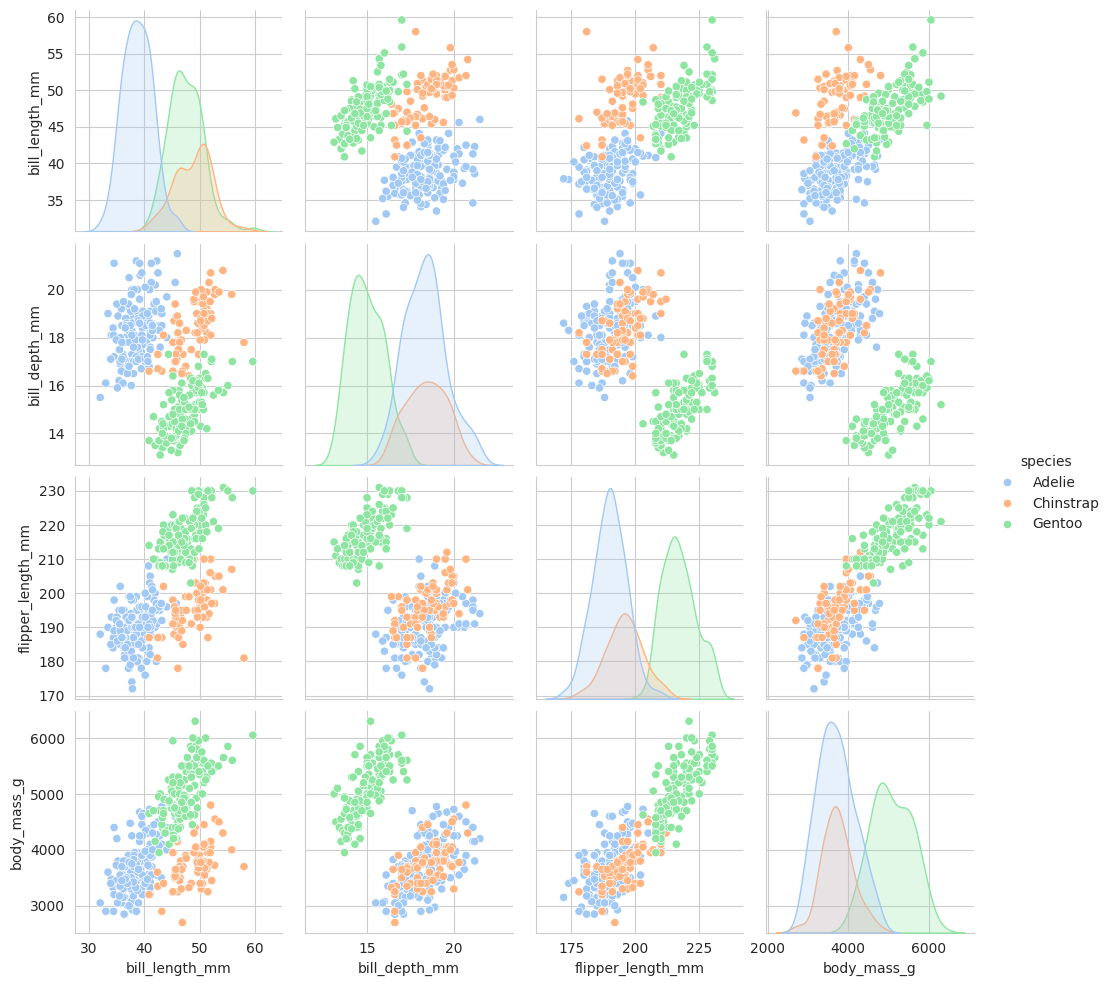

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim.drop(['sex', 'island'], axis=1), hue="species", palette="pastel")

**Comentário:**

*   A espécie Gentoo é mais pesada que as outras raças, seu individuos mais leves têm seu peso comparáveis aos mais pesados de outras espécies.
*   Tambem conseguimos notar, que o comprimento do flipper(nadadeira) é proporcional ao seu peso.






 - Sexo por espécie:

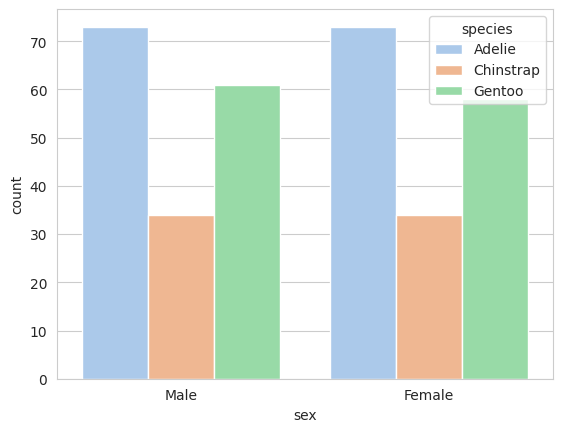

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=penguim, x='sex', hue="species", palette="pastel")

**Comentário:** A distribuição do sexo por especie é bem proporcional.

 - Ilha por espécie:

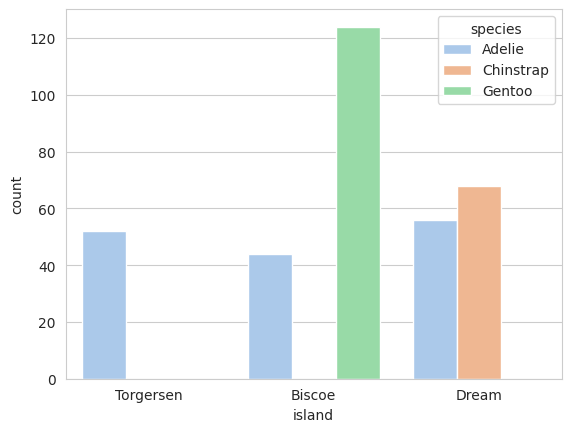

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=penguim, x='island', hue="species", palette="pastel")

**Comentário:**

*   Podemos notar que a espécie Adelie esta presente nas três(3) ilhas.
*   Notamos que na ilha de Biscoe a população de penguins da raça Gentoo é 3 vezes maior que a da raça Adelie.
*   A raça Chinstrap tem a população superior à raça Adelie na ilha Dream.



## 2\. Dados

### **2.1. Valores nulos**

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [ ]:
# resposta da questão 2.1
penguim.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [6]:
penguim = penguim.dropna(subset='sex')
penguim.isnull().sum()

species                0
island                 0
bill_length_mm         0
bill_depth_mm          0
flipper_length_mm      0
body_mass_g            0
sex                    0
sex_m_nom              0
sex_f_nom              0
island_torgesen_nom    0
island_biscoe_nom      0
island_dream_nom       0
dtype: int64

### **2.2. Variáveis categóricas**

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

> **Nota**: Por definição, árvores de decisão **não precisam** da transformação de atributos categóricos em numéricos. Contudo, por **limitação** do pacote Python Scikit Learn, devemos conduzir esta etapa. Mais informações neste [link](https://scikit-learn.org/stable/modules/tree.html#tree).

In [7]:
# resposta da questão 2.2
penguim['sex_m_nom'] = penguim['sex'].apply(lambda sex: 1 if sex == 'Male' else 0)
penguim['sex_f_nom'] = penguim['sex'].apply(lambda sex: 1 if sex == 'Female' else 0)
penguim["island_torgesen_nom"] = penguim["island"].apply(lambda ilha: 1 if ilha == "Torgersen" else 0)
penguim["island_biscoe_nom"] = penguim["island"].apply(lambda ilha: 1 if ilha == "Biscoe" else 0)
penguim["island_dream_nom"] = penguim["island"].apply(lambda ilha: 1 if ilha == "Dream" else 0)

penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sex_m_nom,sex_f_nom,island_torgesen_nom,island_biscoe_nom,island_dream_nom
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1,0,1,0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0,1,1,0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0,1,1,0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0,1,1,0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1,0,1,0,0


### **2.3. Limpeza**

Descarte as colunas categóricas originais e mantenha a variável resposta na primeira coluna do dataframe.

In [10]:
# resposta da questão 2.3
penguim.drop(columns=['island', 'sex'], inplace = True)

In [11]:
penguim

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_m_nom,sex_f_nom,island_torgesen_nom,island_biscoe_nom,island_dream_nom
0,Adelie,39.1,18.7,181.0,3750.0,1,0,1,0,0
1,Adelie,39.5,17.4,186.0,3800.0,0,1,1,0,0
2,Adelie,40.3,18.0,195.0,3250.0,0,1,1,0,0
4,Adelie,36.7,19.3,193.0,3450.0,0,1,1,0,0
5,Adelie,39.3,20.6,190.0,3650.0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,4925.0,0,1,0,1,0
340,Gentoo,46.8,14.3,215.0,4850.0,0,1,0,1,0
341,Gentoo,50.4,15.7,222.0,5750.0,1,0,0,1,0
342,Gentoo,45.2,14.8,212.0,5200.0,0,1,0,1,0


### **2.4. Treino/Teste**

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes.

In [14]:
# resposta da questão 2.4
predictors_train, predictors_test, target_train, target_test = train_test_split(
    penguim.drop(['species'], axis=1),
    penguim['species'],
    test_size=0.33,
    random_state=1414
)

## 3\. Modelagem

### **3.1. Treino**

Treine um modelo de **árvore de decisão** com os **dados de treino** (2/3). Gere o gráfico da árvore do modelo treinado e responda: quantas **folhas** a árvore treinada possui?

**Resposta:** 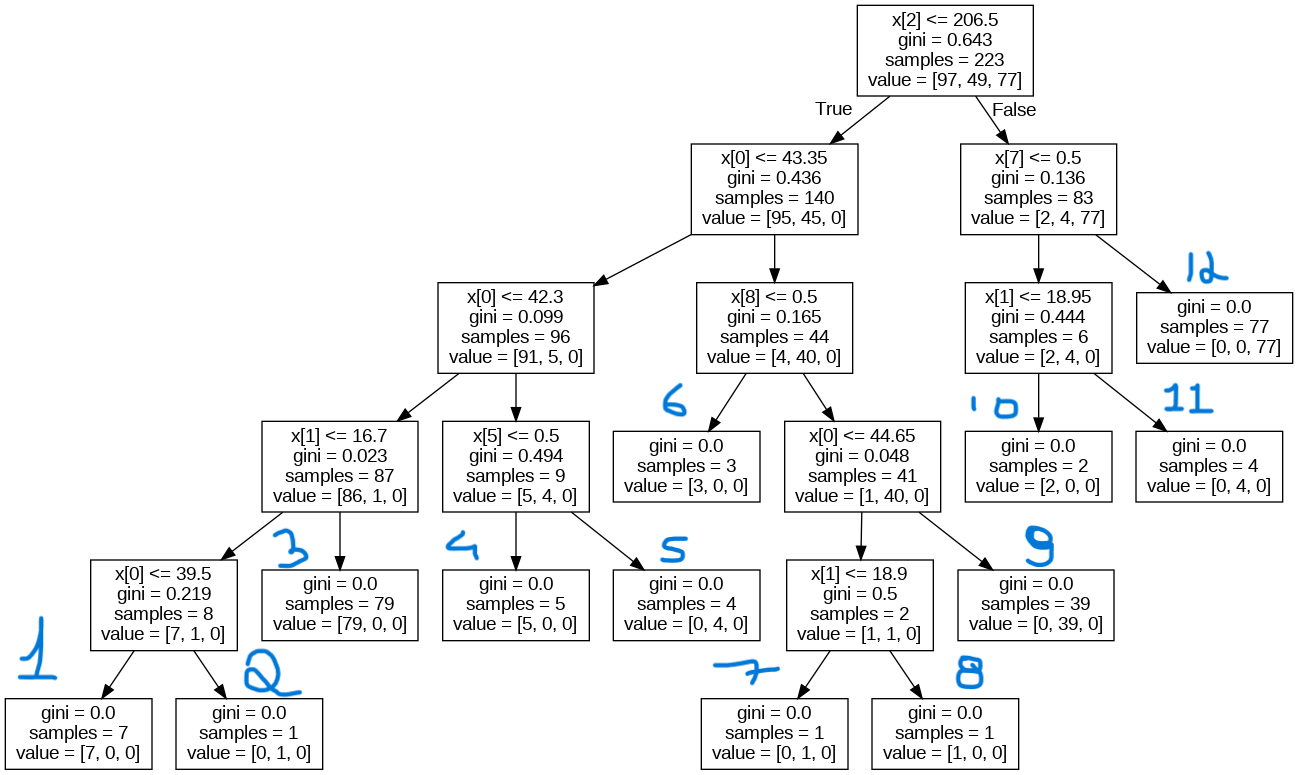
* 12 Folhas.

In [16]:
# resposta da questão 3.1

model = DecisionTreeClassifier()
model = model.fit(predictors_train, target_train)

In [22]:
tree_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(tree_data)

graph.render("arvore", format="png")

'arvore.png'

### **3.2. Avaliação**

**a.** Matriz de Confusão

Calcule e visualize a **matriz de confusão** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3). Comente os resultados.

**Comentário:** Então, houve apenas um erro na predição, foi predito que um especie Gentoo como Adelie.

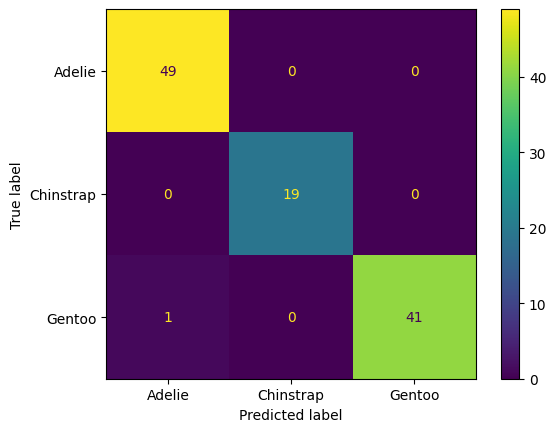

In [25]:
# resposta da questão 3.2.a

target_predicted = model.predict(predictors_test)

conf_matrix = confusion_matrix(target_test, target_predicted)

conf_matrix_plot = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
conf_matrix_plot.plot()

**b.** Acurácia

Calcule a **acurácia** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui uma acurácia de approx. 96% (sua acurácia pode não ser igual).

In [26]:
# resposta da questão 3.2.b

acuracia = accuracy_score(target_test, target_predicted)
print(acuracia)

0.990909090909091


## 4\. Predição  

### **4.1. Novo penguim**

Qual a espécie de um penguim com as seguintes características:


| island | bill_length_mm | bill_depth_mm | flipper_length_mm | body_mass_g | sex |
| --- | --- | --- | --- | --- | --- |
| Biscoe | 38.2 | 18.1 | 185.0 | 3950.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2. A ordem dos atributos importa, deve ser a mesma usada na modelagem.

> **Nota:** Como referência eu obtive **adelie** como espécie predita (a sua predição pode não ser igual).

In [27]:
# resposta da questão 4.1

predictors_test.iloc[[0]]

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_m_nom,sex_f_nom,island_torgesen_nom,island_biscoe_nom,island_dream_nom
105,39.7,18.9,184.0,3550.0,1,0,0,1,0


In [30]:
# criando pinguim.
penguim_test = np.array([38.2, 18.1, 185.0, 3950.0, 1, 0, 0, 0, 1])

In [31]:
new_penguim = model.predict(penguim_test.reshape(1,-1))
print(new_penguim)

['Adelie']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**Com as características passadas foi predito um penguim da especie Adelie.**

---